<h1>Table of Contents<span class="tocSkip"></span></h1>

- overview


 <b>
<p>
<center>
<font size="5">
Credit Default Prediction : Identifying Key Drivers of Delinquency
</font>
</center>
</p>

    
<p>
<center>
<font size="4">
Machine Learning Final Project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Group 5 : Sameer Batra & Jeongmin An
</font>
</center>
</p>
</b>

# Overview

- Data Analysis for "Give Me Some Credit" Dataset

# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv("GiveMeSomeCredit/cs-training.csv", index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Understand Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## Target Variable Analysis

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

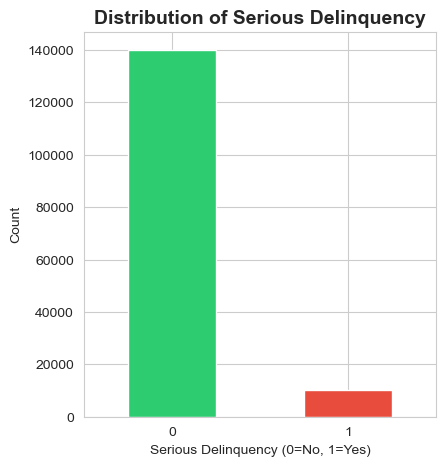

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['SeriousDlqin2yrs'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Serious Delinquency', fontsize=14, fontweight='bold')
plt.xlabel('Serious Delinquency (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

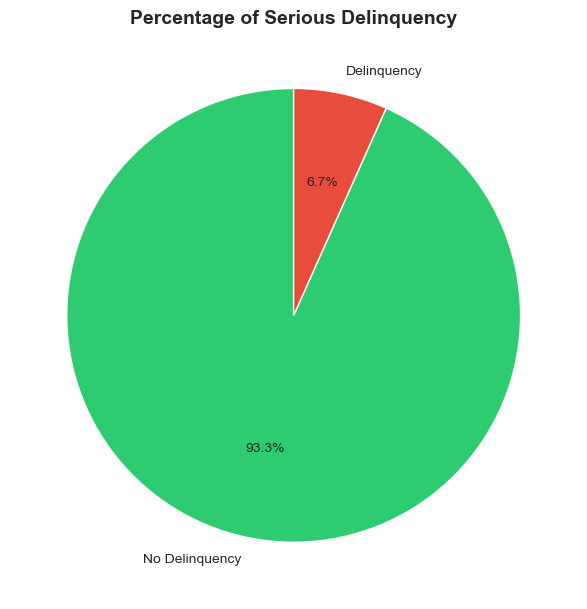

In [8]:
plt.subplot(1, 2, 2)
target_pct = df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
plt.pie(target_pct, labels=['No Delinquency', 'Delinquency'], autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Percentage of Serious Delinquency', fontsize=14, fontweight='bold')

plt.tight_layout()
# plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
# plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

## Age distribution

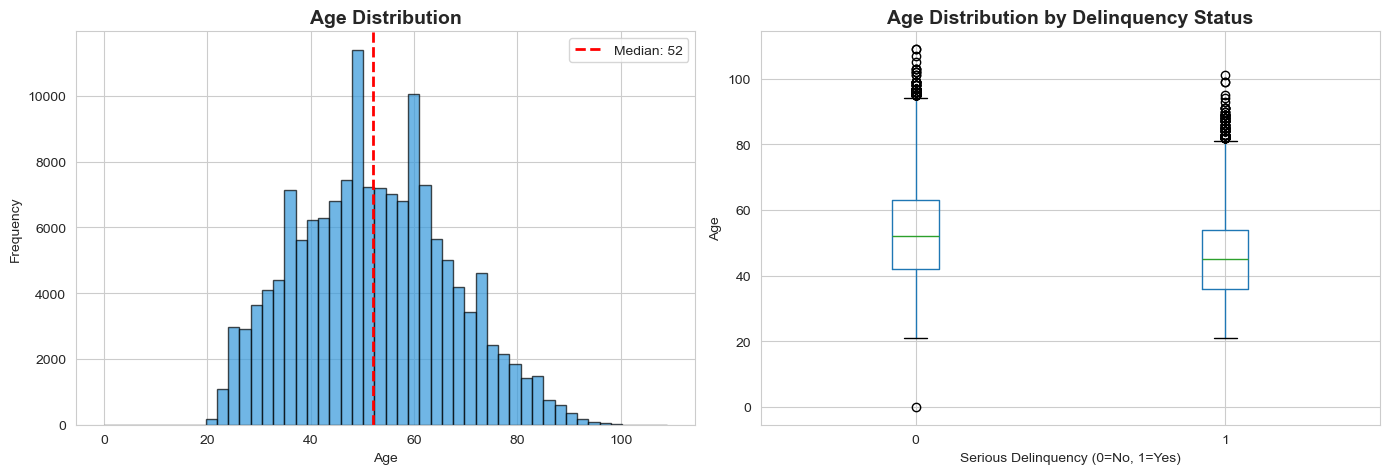

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall age distribution
axes[0].hist(df['age'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['age'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["age"].median():.0f}')
axes[0].legend()

df.boxplot(column='age', by='SeriousDlqin2yrs', ax=axes[1])
axes[1].set_title('Age Distribution by Delinquency Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Serious Delinquency (0=No, 1=Yes)')
axes[1].set_ylabel('Age')
plt.suptitle('')

plt.tight_layout()
# plt.savefig('age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## Monthly Income Analysis

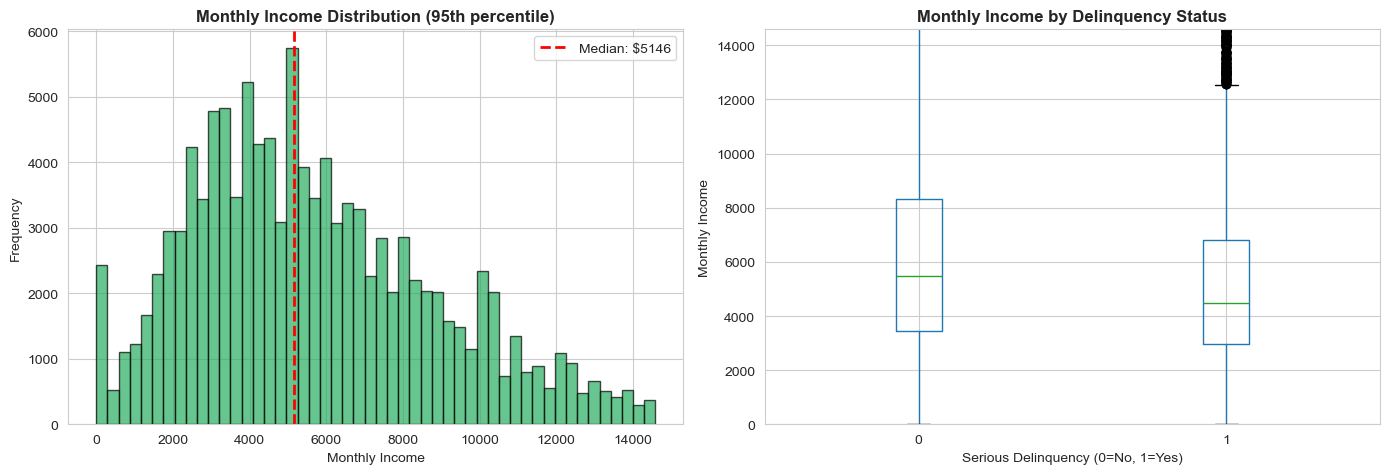

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Remove outliers for visualization
income_clean = df['MonthlyIncome'].dropna()
income_capped = income_clean[income_clean <= income_clean.quantile(0.95)]

axes[0].hist(income_capped, bins=50, color='#27ae60', edgecolor='black', alpha=0.7)
axes[0].set_title('Monthly Income Distribution (95th percentile)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Income')
axes[0].set_ylabel('Frequency')
axes[0].axvline(income_capped.median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: ${income_capped.median():.0f}')
axes[0].legend()

# Income by target (log scale for better visualization)
income_by_target = df[['MonthlyIncome', 'SeriousDlqin2yrs']].dropna()
income_by_target.boxplot(column='MonthlyIncome', by='SeriousDlqin2yrs', ax=axes[1])
axes[1].set_title('Monthly Income by Delinquency Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Serious Delinquency (0=No, 1=Yes)')
axes[1].set_ylabel('Monthly Income')
axes[1].set_ylim([0, income_clean.quantile(0.95)])

plt.suptitle('')
plt.tight_layout()
# plt.savefig('income_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Late Payment Behavior

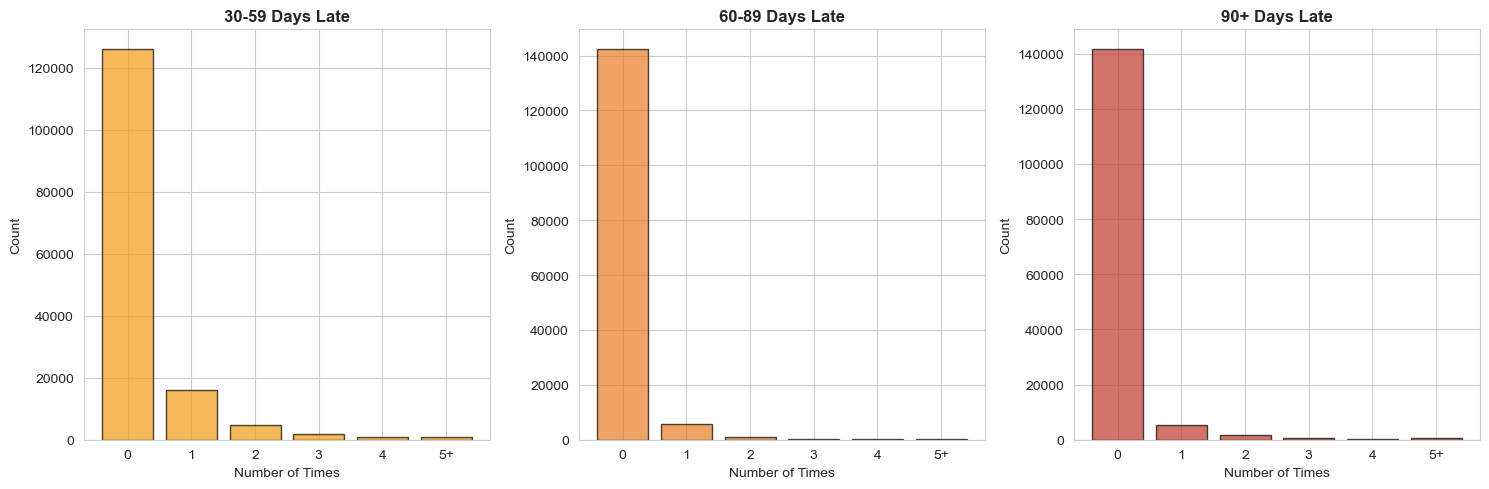

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

late_cols = ['NumberOfTime30-59DaysPastDueNotWorse', 
             'NumberOfTime60-89DaysPastDueNotWorse', 
             'NumberOfTimes90DaysLate']
titles = ['30-59 Days Late', '60-89 Days Late', '90+ Days Late']
colors = ['#f39c12', '#e67e22', '#c0392b']

for i, (col, title, color) in enumerate(zip(late_cols, titles, colors)):
    # Cap at reasonable value for visualization
    data_capped = df[col].clip(upper=5)
    value_counts = data_capped.value_counts().sort_index()
    
    axes[i].bar(value_counts.index, value_counts.values, color=color, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{title}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Number of Times')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(6))
    axes[i].set_xticklabels(['0', '1', '2', '3', '4', '5+'])

plt.tight_layout()
# plt.savefig('late_payments_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Correlation Analysis

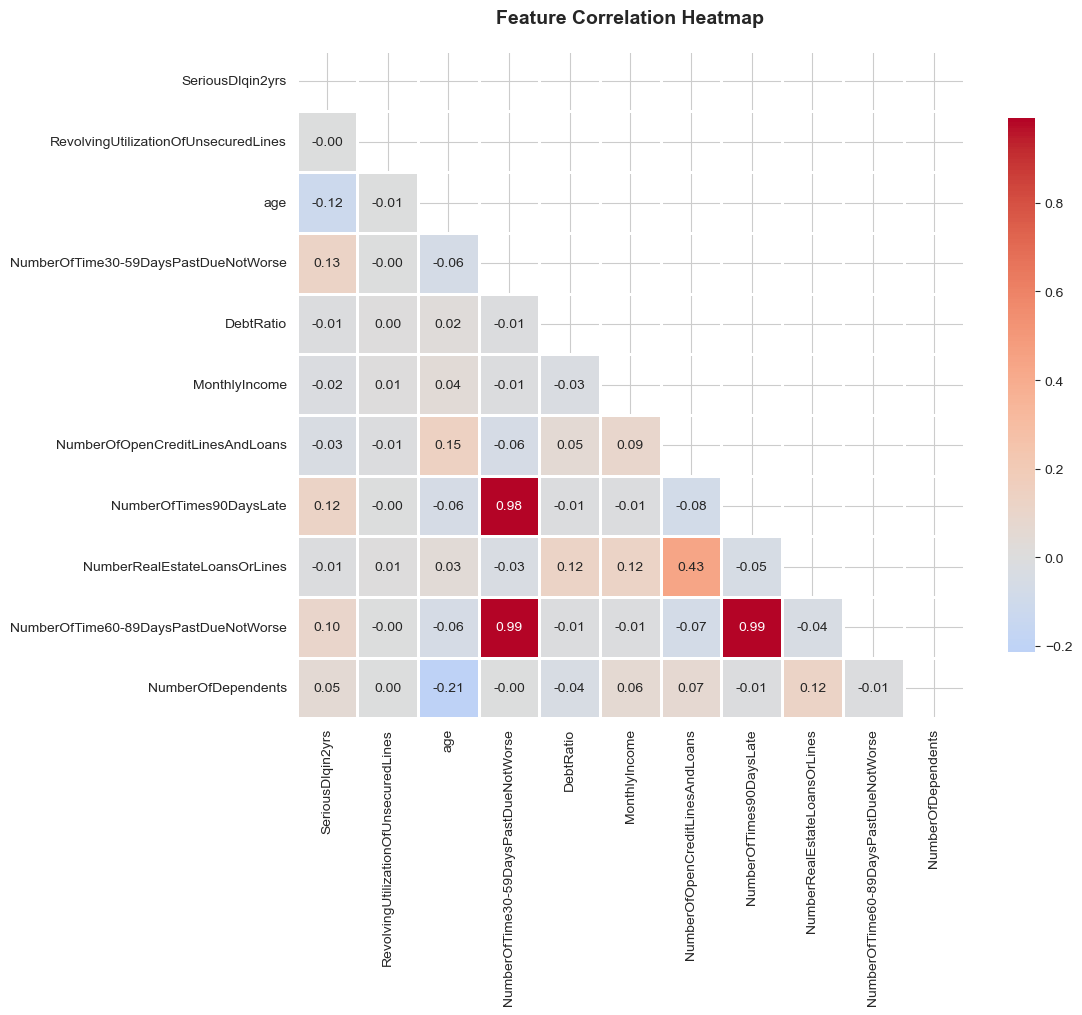

In [12]:
import numpy as np  
plt.figure(figsize=(12, 10))
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Preprocessing

## Missing Values Analysis

In [13]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

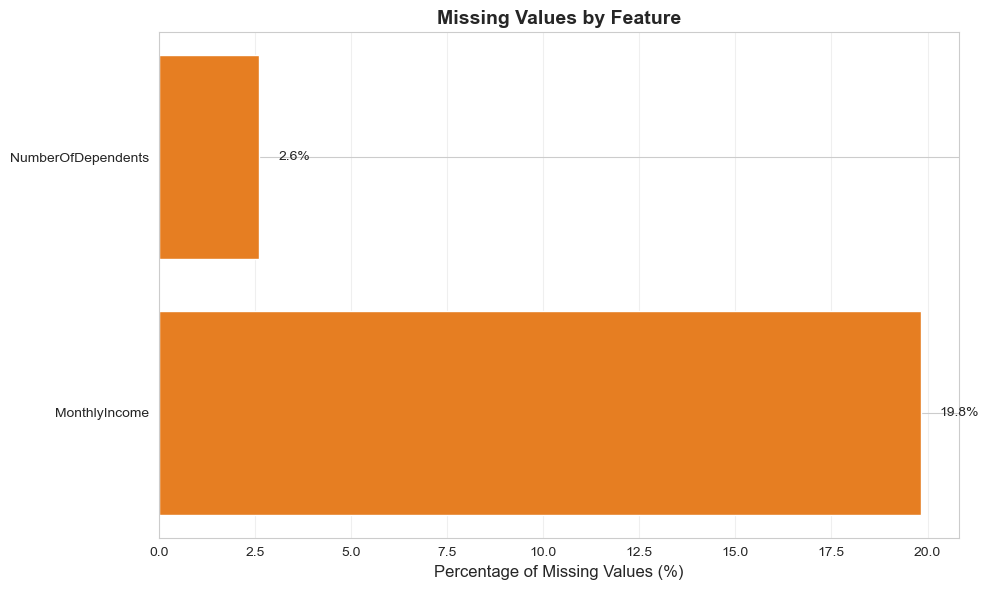

In [14]:
plt.figure(figsize=(10, 6))
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

plt.barh(range(len(missing)), missing_pct, color='#e67e22')
plt.yticks(range(len(missing)), missing.index)
plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(missing_pct):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.tight_layout()

## Handle Missing Value


### Remove Invalid Age Values

In [15]:
df['age'].value_counts()

age
49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: count, Length: 86, dtype: int64

In [16]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [17]:
df.drop(df[df['age'] == df['age'].min()].index, inplace=True)

### Impute Missing Monthly Income

In [18]:
df['MonthlyIncome'] = df.groupby('age')['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))

In [19]:
df.isna().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              4
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

In [20]:
df[df['MonthlyIncome'].isna()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
40008,0,0.064748,107,0,939.0,NaN,9,0,1,0,0.0
56762,0,0.003469,105,0,2.0,NaN,4,0,0,0,NaN
105791,0,0.109307,109,0,2141.0,NaN,17,0,1,0,NaN
138292,0,0.246529,109,0,318.0,NaN,3,0,0,0,NaN


In [21]:
df = df[df['MonthlyIncome'].notna()]

In [22]:
df.isna().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3921
dtype: int64

### Impute Missing Dependents

In [23]:
df['NumberOfDependents'].value_counts(dropna=False)

NumberOfDependents
0.0     86901
1.0     26316
2.0     19521
3.0      9483
NaN      3921
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [24]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

/var/folders/q5/1h3frycs3758zsrhh4g8hh6h0000gn/T/ipykernel_28184/3802992407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)


In [25]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Handling outliers

In [26]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149995.000000
mean          6.048630
std         249.759531
min           0.000000
25%           0.029867
50%           0.154186
75%           0.559048
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [27]:
# The column RevolvingUtilizationOfUnsecuredLines shows that how over limit the user is from their original credit limit. 
df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= 1.5]  # Allow up to 150%

In [28]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149395.000000
mean          0.318203
std           0.351488
min           0.000000
25%           0.029647
50%           0.152395
75%           0.551286
max           1.499474
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [44]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

In [45]:
# Usage
df = remove_outliers_iqr(df, ['age'])
df = remove_outliers_iqr(df, ['MonthlyIncome'])
df = remove_outliers_iqr(df, ['DebtRatio'])
df = remove_outliers_iqr(df, ['NumberOfDependents'])

In [46]:
def plot_boxplot(df, column_name, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.boxplot(df[column_name].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    
    plt.ylabel('Value', fontsize=12)
    plt.title(f'Boxplot of {column_name}', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    plt.show()

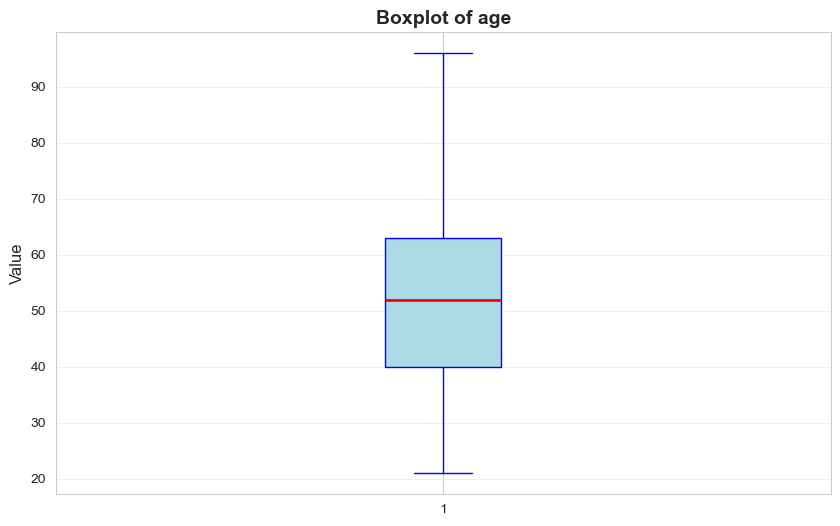

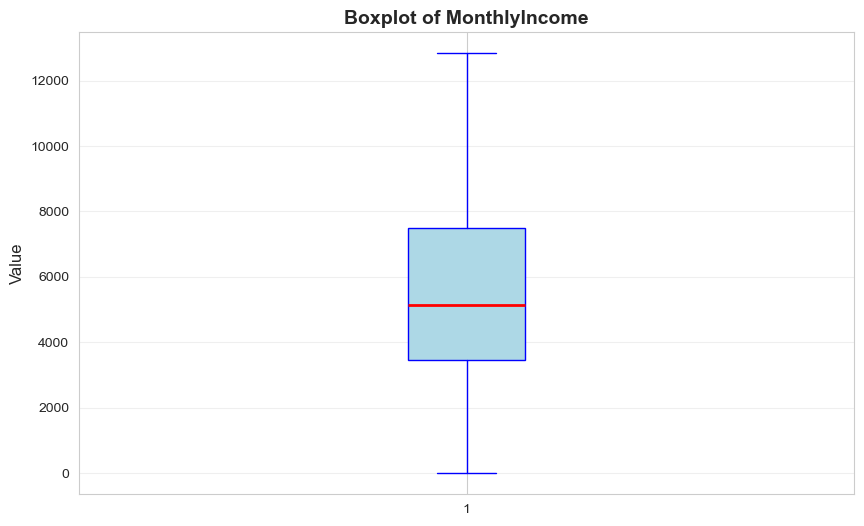

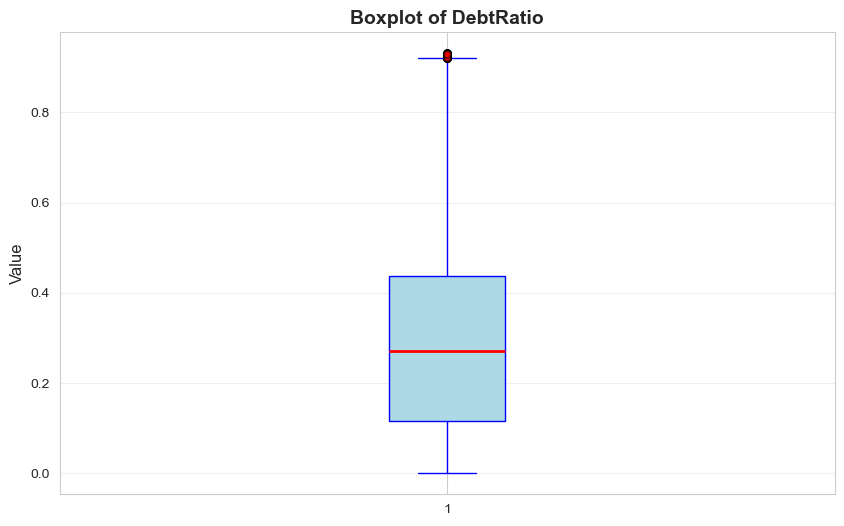

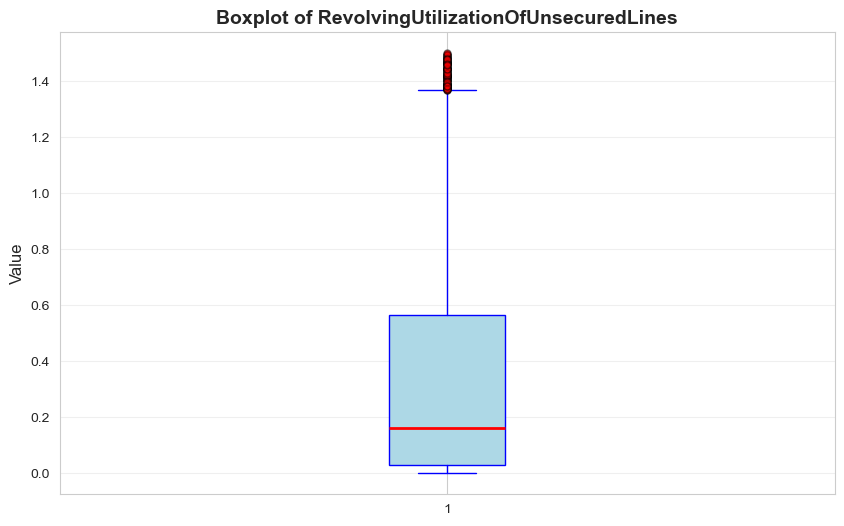

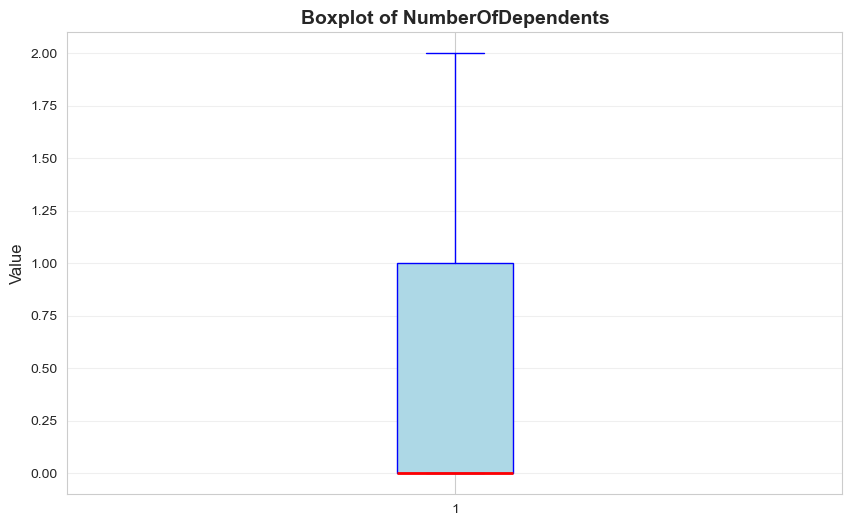

In [47]:
plot_boxplot(df, 'age')
plot_boxplot(df, 'MonthlyIncome')
plot_boxplot(df, 'DebtRatio')
plot_boxplot(df, 'RevolvingUtilizationOfUnsecuredLines')
plot_boxplot(df, 'NumberOfDependents')

In [48]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000,94539.000000
mean,0.064852,0.324129,51.869673,0.484107,0.295913,5590.426031,8.318778,0.330181,0.892954,0.305102,0.537228
std,0.246265,0.353912,15.287477,4.903329,0.221613,2799.711626,5.057245,4.885300,0.956680,4.874704,0.751410
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029858,40.000000,0.000000,0.115724,3449.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.160624,52.000000,0.000000,0.271314,5140.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.565423,63.000000,0.000000,0.437534,7499.000000,11.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.499474,96.000000,98.000000,0.931191,12834.000000,57.000000,98.000000,14.000000,98.000000,2.000000


In [49]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    88408
1     6131
Name: count, dtype: int64

In [50]:
df.to_csv("GiveMeSomeCredit/GiveMeSomeCredit-cleaned.csv", index=True)

# Load Cleaned Dataset 

In [92]:
df = pd.read_csv("GiveMeSomeCredit/GiveMeSomeCredit-cleaned.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [93]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


# Splitting the data

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split

random_seed = 42  

target_col = 'SeriousDlqin2yrs'
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=random_seed,
    stratify=y )

X_train.shape, X_test.shape

((75631, 10), (18908, 10))

# Hyperparameter Tuning
## Creating the dictionary of the models

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


models = {'lr': LogisticRegression(class_weight='balanced', max_iter=1000,random_state=random_seed),
          'rf': RandomForestClassifier(random_state=random_seed),
          'gb': GradientBoostingClassifier(random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, max_iter=200, random_state=random_seed)}

## Creating the dictionary of the pipelines

In [96]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


pipes = {}

for acronym, model in models.items():
    if acronym in ['lr','mlpc']:
        pipes[acronym] = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=random_seed)),
        ('model', model),
        ])

    else:
        pipes[acronym] = Pipeline([
            ('smote', SMOTE(random_state=random_seed)),
            ('model', model),
        ])

pipes

{'lr': Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                 ('model',
                  LogisticRegression(class_weight='balanced', max_iter=1000,
                                     random_state=42))]),
 'rf': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('model', RandomForestClassifier(random_state=42))]),
 'gb': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('model', GradientBoostingClassifier(random_state=42))]),
 'mlpc': Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                 ('model', MLPClassifier(early_stopping=True, random_state=42))])}

## GridSearch CV
### Creating the dictionary of the parameter grids

In [97]:
param_grids = {}

#### The parameter grid for Logistic Regression

In [98]:
# 1) Logistic Regression
param_grids['lr'] = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__class_weight': [None, 'balanced']
}

#### The parameter grid for Random Forest

In [99]:
# 2) Random Forest
param_grids['rf'] = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [5, 10, None],
    'model__min_samples_split': [2, 5],
    'model__class_weight': [None, 'balanced_subsample']  # imbalance
}

#### The parameter grid for Gradient Boosting

In [100]:
# 3) Gradient Boosting
param_grids['gb'] = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [2, 3]
}

#### The parameter grid for MLPClassifier

In [101]:
# 4) MLPClassifier
alpha_grids = [10 ** i for i in range(-6, -3)]          # 1e-6 ~ 1e-3
lr_init_grids = [1e-4, 5e-4, 1e-3]                   # [10 ** i for i in range(-4, -1)]  # 1e-4 ~ 1e-2
hidden_layer_sizes_grids = [(50,), (100,), (100, 50)]


param_grids['mlpc'] = {
    'model__alpha': alpha_grids,
    'model__learning_rate_init': lr_init_grids,
    'model__hidden_layer_sizes': hidden_layer_sizes_grids
}

### Tuning the hyperparameters

In [102]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd

In [103]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

best_score_params_estimator_gs = {} 

for acronym, pipe in pipes.items():
    print(f"=== Tuning {acronym} ===")
    
    gs = GridSearchCV(
        estimator=pipes[acronym],
        param_grid=param_grids[acronym],
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1,
        return_train_score=True
    )

    gs.fit(X_train, y_train)
    best_score_params_estimator_gs[acronym] = gs


    print("  Best AUC (cv):", gs.best_score_)
    print("  Best Params :", gs.best_params_)
    print()

=== Tuning lr ===


  Best AUC (cv): 0.8003120188122906
  Best Params : {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2'}

=== Tuning rf ===


/opt/anaconda3/envs/dats6450/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  Best AUC (cv): 0.8288796825755235
  Best Params : {'model__class_weight': None, 'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 400}

=== Tuning gb ===
  Best AUC (cv): 0.8266416486830949
  Best Params : {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}

=== Tuning mlpc ===


/opt/anaconda3/envs/dats6450/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dats6450/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dats6450/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dats6450/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anacond

  Best AUC (cv): 0.8504624275078969
  Best Params : {'model__alpha': 1e-06, 'model__hidden_layer_sizes': (50,), 'model__learning_rate_init': 0.0001}



In [104]:
import pandas as pd

summary_rows = []
for acronym, gs in best_score_params_estimator_gs.items():
    row = {
        'model': acronym,
        'best_cv_auc': gs.best_score_,
        'best_params': gs.best_params_
    }

    # test AUC
    y_prob_test = gs.best_estimator_.predict_proba(X_test)[:, 1]
    row['test_auc'] = roc_auc_score(y_test, y_prob_test)

    summary_rows.append(row)

cv_summary = pd.DataFrame(summary_rows).sort_values('best_cv_auc', ascending=False)
cv_summary = pd.DataFrame(summary_rows).sort_values('test_auc', ascending=False)
cv_summary

,model,best_cv_auc,best_params,test_auc
3,mlpc,0.850462,"{'model__alpha': 1e-06, 'model__hidden_layer_s...",0.849495
1,rf,0.828880,"{'model__class_weight': None, 'model__max_dept...",0.828572
2,gb,0.826642,"{'model__learning_rate': 0.05, 'model__max_dep...",0.826102
0,lr,0.800312,"{'model__C': 0.1, 'model__class_weight': None,...",0.801969


## Model selection

In [105]:
# Evaluate the Best Model on the Test Set

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_acronym = cv_summary.iloc[0]['model']
best_gs = best_score_params_estimator_gs[best_acronym]
best_model = best_gs.best_estimator_

print(f"Best model: {best_acronym}")
print("Best params:", best_gs.best_params_)
print("Best CV AUC:", best_gs.best_score_)
print()

y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)


print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:")
print(classification_report(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Best model: mlpc
Best params: {'model__alpha': 1e-06, 'model__hidden_layer_sizes': (50,), 'model__learning_rate_init': 0.0001}
Best CV AUC: 0.8504624275078969

Test AUC: 0.849494965710145

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     17682
           1       0.23      0.69      0.34      1226

    accuracy                           0.83     18908
   macro avg       0.60      0.76      0.62     18908
weighted avg       0.93      0.83      0.86     18908


Confusion matrix:
[[14781  2901]
 [  378   848]]
